# Data visualisation in Python

## Matplotlib

> The contents are adapted from Stanford course CS231 - [source](https://cs231n.github.io/python-numpy-tutorial/).

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [22]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [ ]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

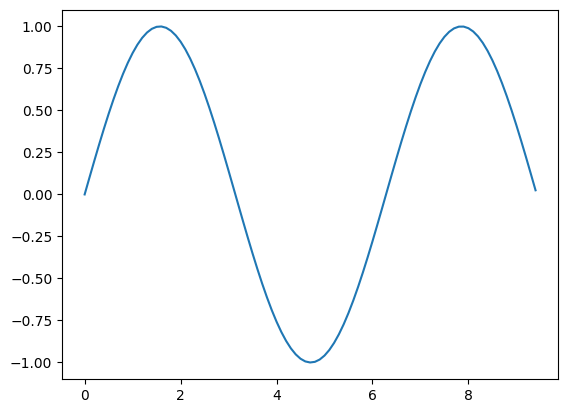

In [23]:
import numpy as np

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

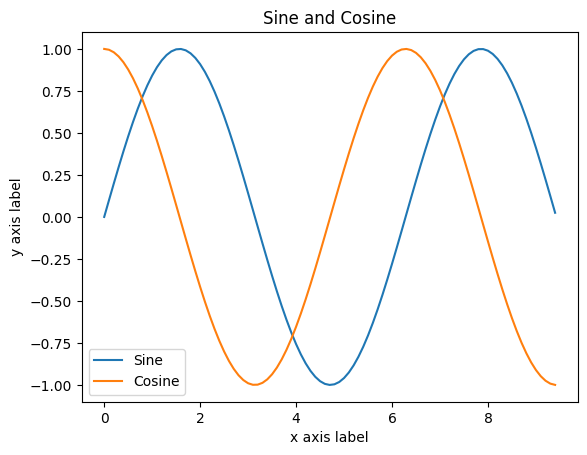

In [24]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

## Data Visualization with Seaborn


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Loading exmample datasets
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
penguins = sns.load_dataset("penguins")
diamonds = sns.load_dataset("diamonds")
tips = sns.load_dataset("tips")
anscombe = sns.load_dataset("anscombe")
flights = sns.load_dataset("flights")

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Data distribution

**Displot** ([docs](https://seaborn.pydata.org/generated/seaborn.displot.html))

We can customize the plot by selecting `kind={'kde', 'hist', 'ecdf'}`.
We can also specidy `rug` and `bins` param

We can also pass params to underlying KDE or Hist plots as kwargs.

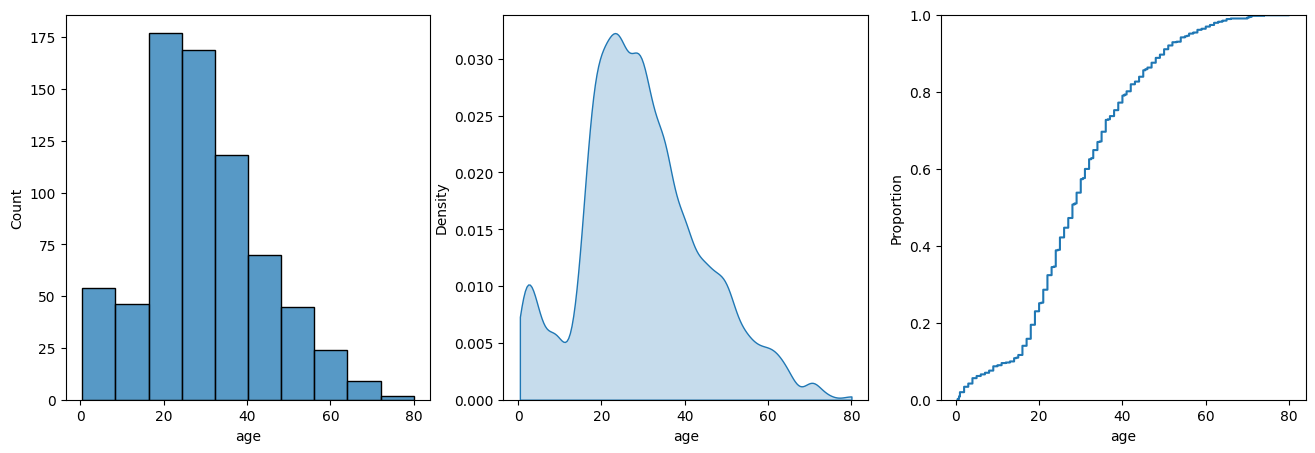

In [29]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(16, 5)

# sns.displot(titanic, x='age', kind='kde')

# Alternative for sns.displot, which cannot be used with custom axes, since it's figure-level
sns.histplot(titanic['age'], bins=10, ax=axs[0])
sns.kdeplot(titanic['age'], fill=True, bw_adjust=.5, cut=0, ax=axs[1])

# Empirical cumulative distributions
_ = sns.ecdfplot(titanic['age'], ax=axs[2])

We can use `hue` semantics as well to plot distributions for different variables

In [ ]:
_ = sns.displot(penguins, x="flipper_length_mm", hue="species", kind="hist", fill=True)

More info on plotting distributions in [Seaborn tutorial](https://seaborn.pydata.org/tutorial/distributions.html)

### Regression

Regression plots are a part of **bivariate** analysis, meaning they analyse two variables on the one plot.

Main tools for regression plots: `regplot` and on top of it `lmplot`.

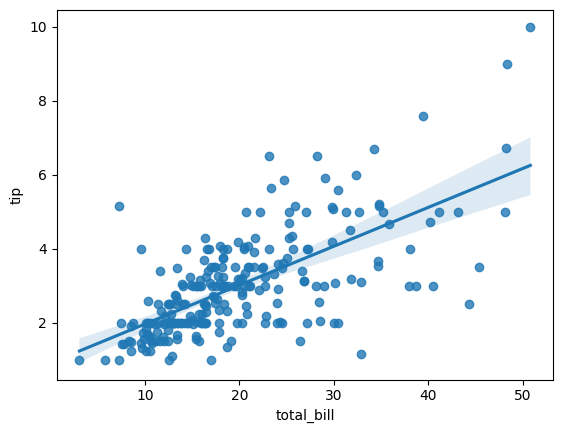

In [30]:
_ = sns.regplot(x="total_bill", y="tip", data=tips)

Other techiniques to work with regression are provided in [tutorial](https://seaborn.pydata.org/tutorial/regression.html)

### Additional plot types

#### Categorical plots

Seaborn has a high-level interface for plotting catergorical data - function `catplot()`. It provides interface for underlyiing plotting functions.


Seaborn has three main types of plots shown below for categorical data

#### Scatterplots
These plots show each observation/data point

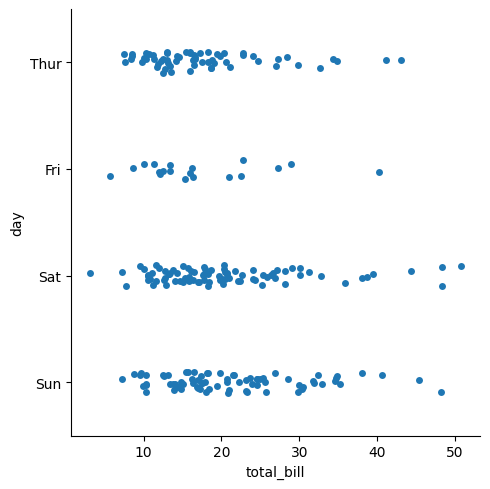

In [32]:
# stripplot + random “jitter” - default for catplot
_ = sns.catplot(y="day", x="total_bill",  data=tips, kind='strip')

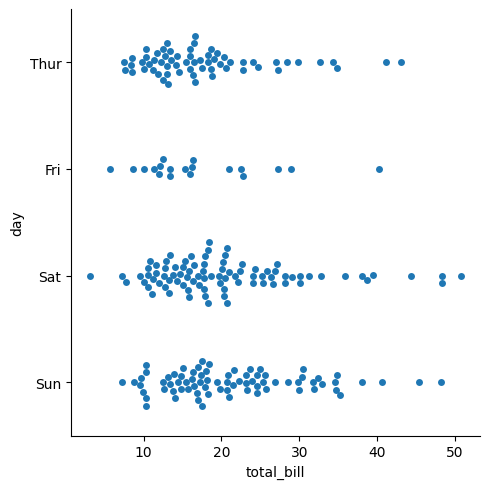

In [33]:
# swarmplot
_ = sns.catplot(y="day", x="total_bill", kind="swarm", data=tips)

#### Distribution plots
They show abstract representations of data (like box or violin plots)

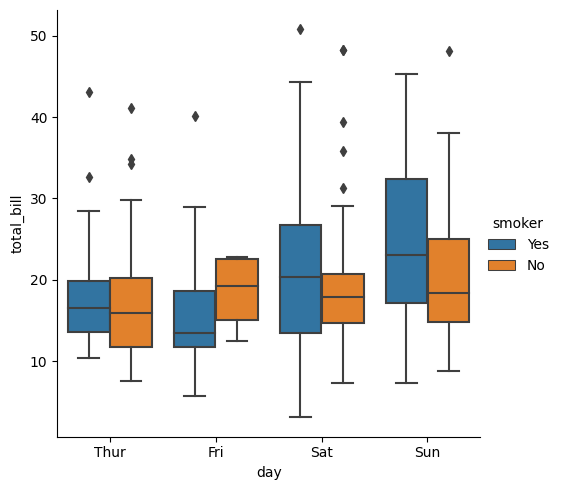

In [34]:
# "dodge=True" by default
_ = sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

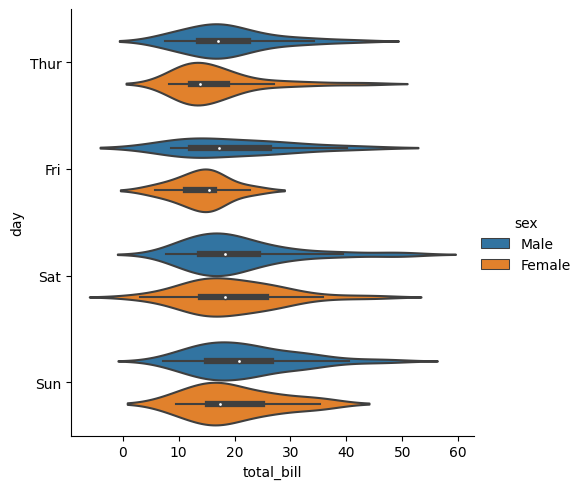

In [37]:
_ = sns.catplot(x="total_bill", y="day", hue="sex", kind="violin", orient="h", data=tips)

It's also useful to combine plots in the following manner:

<Axes: xlabel='day', ylabel='total_bill'>

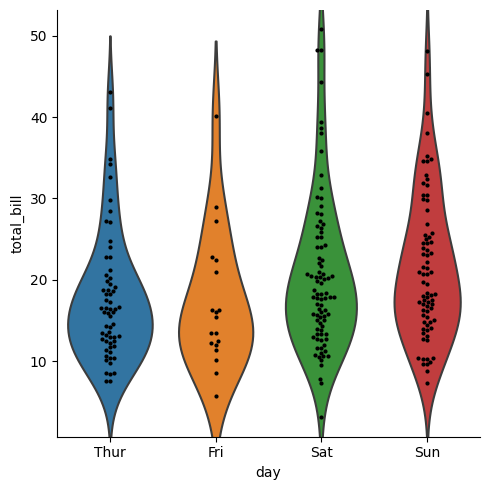

In [38]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)

## Additional materials

[Official matplotlib tutorials](https://matplotlib.org/stable/tutorials/index.html)

[w3schools tutorial](https://www.w3schools.com/python/matplotlib_intro.asp)

https://seaborn.pydata.org/tutorial.html